<a href="https://colab.research.google.com/github/Shirui-peng/Deep-Learning-in-Quantitative-Trading/blob/main/Chapter2/01_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [2]:
def read_data(ticker, start_date, end_date, interval):
  df = yf.download(tickers=ticker, start=start_date, end=end_date, interval=interval)
  df['ret'] = df['Close'].pct_change()
  df['log_ret'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
  df = df.dropna()
  return df

df = read_data('AAPL', "2000-01-01", "2024-12-31", interval='1d')

/tmp/ipython-input-279271186.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed


## Histogram and QQ-plot

In [3]:
dta = df['ret'].values
print('Stock index')
print("Kurtosis: ", stats.kurtosis(dta))
print('Skew:', stats.skew(dta))
print('Mean:', np.mean(dta))
print('Median:', np.median(dta))

Stock index
Kurtosis:  36.624446287341875
Skew: -1.4690626412156638
Mean: 0.0012172629580808488
Median: 0.0009481301011391441


Text(0.5, 1.0, '')

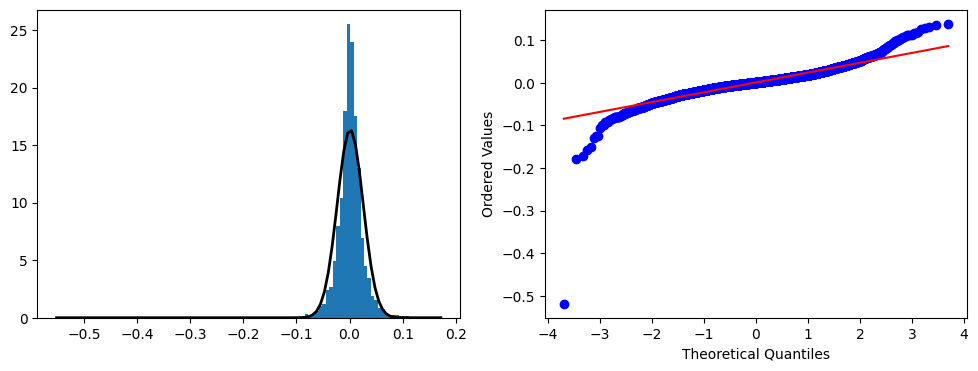

In [4]:
# histgram
plt.figure(figsize=(12,4))
plt.subplot(121)
s = plt.hist(df['ret'], bins=100, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(df['ret']), np.std(df['ret']))
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(122)
a = stats.probplot(np.array(df['ret']), dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('')

## Normality Test

In [5]:
test_stats, pvalue, _, _ = jarque_bera(df['ret'])
print('test statistics:', test_stats, 'pvalue:', pvalue)

test statistics: 353639.20398285094 pvalue: 0.0


## ACF and PACF

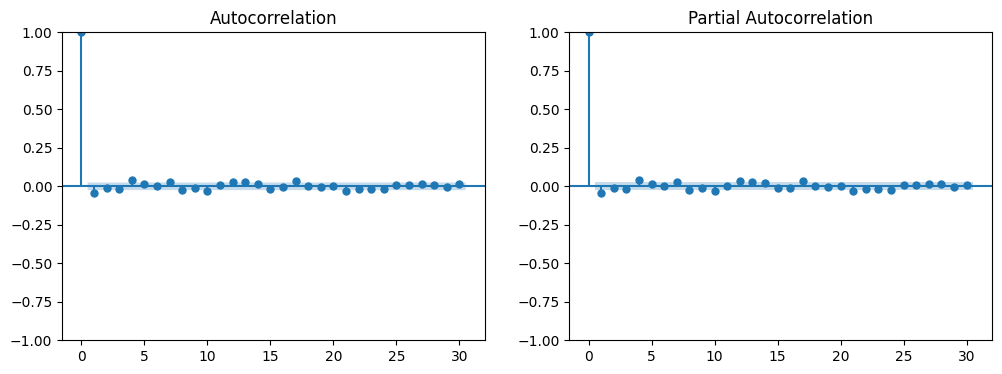

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(df['ret'], lags=30, ax=ax[0])   # ACF
plot_pacf(df['ret'], lags=30, ax=ax[1]) # PACF
plt.show()

# Test for Stationarity

We here use the Augmented Dickey-Fuller test to test for a unit root in the return data. The null hypothesis states that a unit root is present in a time-series sample, whereas the alternative hypothesis suggests stationarity. The result rejects the null hypothesis which indicates stationarity of the series. However, this test typically indicates the stationarity of the mean of a series, suggesting that the mean of the series does not meander over time. For return series, it is usually true but financial returns do not have contstant varince which can be seen from the plot below.

In [7]:
adf_result = adfuller(df['ret'], autolag='AIC')
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -17.993353
p-value: 0.000000


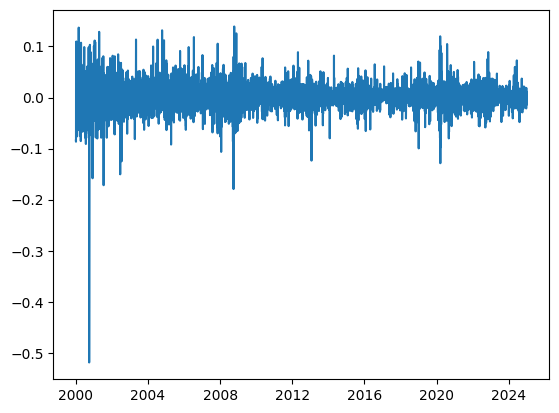

In [8]:
plt.figure()
plt.plot(df['ret'])